# Introduction to Deep Learning

In this notebook we will start our jorney towards the Deep Learning. We will move on to learn the ```Tensorflow```. 

import libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

load the mnist_7000 data

In [63]:
X = pd.read_csv('./data/mnist_7000_data.csv')
y = pd.read_csv('./data/mnist_7000_labels.csv')

Let's see how many different classes we have in the dataset

Each row in X contains 784 features - representing the 28x28 pixels pictures. In order to view the pictures, we will rescale the 784 vector into the 2D matrix of 28x28 and then use the Matplotlib API for displaying the images. Let's view the first images of the dataset


C:\Users\777\AppData\Local\Temp\ipykernel_22108\190954984.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].set_title(y.loc[i][0])


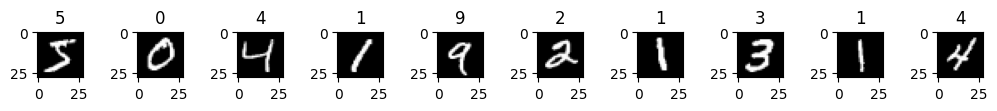

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize= (10, 1), constrained_layout = True)
for i in range(10):
    axes[i].imshow(X.loc[i, :].values.reshape(28, 28), cmap = 'gray')
    axes[i].set_title(y.loc[i][0])


In this part we will rescale the features of the model - dividing it by 255 (the largest possible value of the pixel) to bring everythiong into the range of 0 to 1

In [65]:
X = X/255

We will divide the data into a training set and a test set

In [79]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

In [80]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((4000, 784), (1000, 784), (4000, 1), (1000, 1))

## Tensorflow: Our first Neural Network

To install ```Tensorflow``` run the following
```
pip install tensorflow
```

Instead of writing the pure Tensorflow code, we will use the common ```Keras``` high-level API that wraps the functionality of the package.


In [81]:
import tensorflow.keras as keras
from keras.layers import InputLayer, Dense, Activation
from keras.models import Sequential

In [82]:
import tensorflow as tf
tf.random.set_seed(34)

We will use the Sequential API of Keras. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [97]:
model = Sequential()
model.add(InputLayer(input_shape = 784))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

The arcitecture looks like the following:

![logistic_network](./img/nn_architacture.png)

the summery of the model

In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Each i of the vector representing the "probability" that the input image is classified as a number i. Therefore, in order to use the original labels we need to convert the numbers 0, 1, 2, ..., 9 of the y_test/y_train into the one-hot encoding vectors, where the 0 corresponds to the vector $[1, 0, 0, 0, ..., 0]$, etc.


In [99]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


Now it's time to train the network. We do it by the following steps:

* Compiling the model, defining the optimizer to use (in this case - Stochastic gradient descent) and the metric to use to converge
* Fitting the model by calling the function ```fit``` with the batch size, number of epochs
* Saving the model (into the file of type hdf5) and the history of the train into the CSV file


In [103]:
model.compile(optimizer=keras.optimizers.SGD(), loss = 'categorical_crossentropy', run_eagerly=True, metrics=['accuracy'])

In [104]:
history = model.fit(X_train, y_train_cat, epochs=100, validation_data=(X_test, y_test_cat))

Epoch 1/100
125/125 [==============================] - 1s 11ms/step - loss: 1.8839 - accuracy: 0.4655 - val_loss: 1.4921 - val_accuracy: 0.6630
Epoch 2/100
125/125 [==============================] - 1s 10ms/step - loss: 1.1817 - accuracy: 0.7538 - val_loss: 1.0274 - val_accuracy: 0.7710
Epoch 3/100
125/125 [==============================] - 1s 10ms/step - loss: 0.8401 - accuracy: 0.8270 - val_loss: 0.8077 - val_accuracy: 0.8200
Epoch 4/100
125/125 [==============================] - 1s 10ms/step - loss: 0.6714 - accuracy: 0.8515 - val_loss: 0.6844 - val_accuracy: 0.8370
Epoch 5/100
125/125 [==============================] - 1s 11ms/step - loss: 0.5734 - accuracy: 0.8685 - val_loss: 0.6116 - val_accuracy: 0.8540
Epoch 6/100
125/125 [==============================] - 1s 11ms/step - loss: 0.5104 - accuracy: 0.8810 - val_loss: 0.5588 - val_accuracy: 0.8550
Epoch 7/100
125/125 [==============================] - 1s 11ms/step - loss: 0.4649 - accuracy: 0.8910 - val_loss: 0.5269 - val_accuracy:

save the model

In [105]:
model.save('./model.h5')

C:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


load model